## CA1B - Optimisation in Python


In [1]:
# set up environment
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# for SA AP function limit to 10 decimal places
from decimal import *
getcontext().prec = 10 

**Define Functions to calculate y values**

In [2]:
# Function 1
def getY1(x):
    y1 = float((x-1)*(x-1))
    return y1

# Function 2
def getY2(x):
    y2 = float((x * (x+1.5) * (x-1.5) * (x-2)))
    return y2 
    

## Plot each Function
** Function 1 **

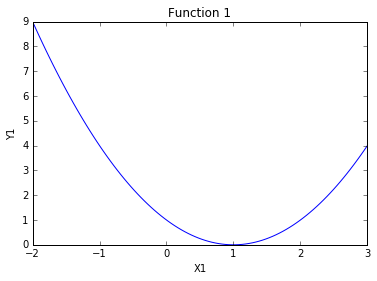

In [3]:
# plot function 1: (x-1)^2
x1 = np.linspace(-2, 3, 100)
y1= []
for x in x1:
    y_1 = getY1(x)
    y1.append(y_1)
plot1 = plt.plot(x1, y1)
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Function 1')

** Function 2**

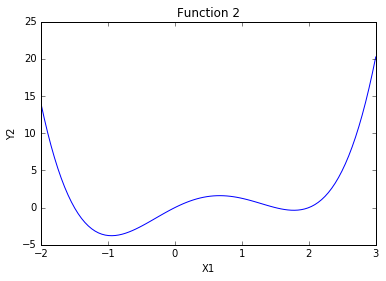

In [4]:
# plot function 2: x(x+1.5)(x-1.5)(x-2) 
y2 = []
for x in x1:
    y_2 = getY2(x)
    y2.append(y_2)
plot2 = plt.plot(x1, y2)
plt.xlabel('X1')
plt.ylabel('Y2')
plt.title('Function 2')

## Random Search

** Define Random Search Function**

In [5]:
# takes as inputs: x values between low and high, the number of times to search and which function to use
def random_search(low, high, times, function):
    count = 0
    test_X = []
    test_Y = []
    best_y = None
    while count < times:
        #generate random number betwenn low and high points
        current_x = np.random.uniform(low, high)
        test_X.append(current_x)
        
        if function == 1:
            current_y = getY1(current_x)
        if function == 2:
            current_y = getY2(current_x)
        test_Y.append(current_y)
        
        # update best value so far: 
        if count == 0:
            best_y = current_x, current_y
        if current_y < best_y[1]:
            best_y = current_x, current_y
        else:
            best_y = best_y
        
        count = count + 1
        random_plot = plt.scatter(test_X, test_Y)
    print 'Random Search Minimum (x,y): ', best_y, 'ran ', times, 'times'
    return best_y

** Run Random Search on Function 1**
 
Run random search a number of times to compare results and plot all points checked

Random Search Minimum (x,y):  (-0.7562204532144912, 3.084310280288913) ran  1 times
Random Search Minimum (x,y):  (1.0205681663771196, 0.00042304946811687143) ran  10 times
Random Search Minimum (x,y):  (1.0169289212977803, 0.00028658837630644087) ran  50 times
Random Search Minimum (x,y):  (0.9556412369310969, 0.001967699861003079) ran  100 times


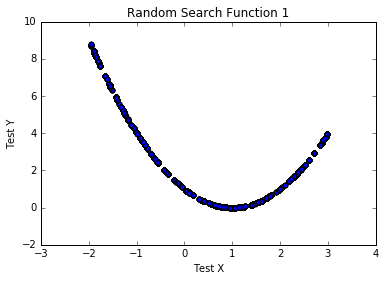

In [6]:
np.random.seed(456)
times_list = [1,10,50,100]
results1 = []
for i in times_list:
    # run random seach on numbers ranging between -2 and 3
    best_y = random_search(-2, 3.0, i, 1)
    results1.append(best_y[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Random Search Function 1')
    

**Plot best performance of random search against number of points examined**

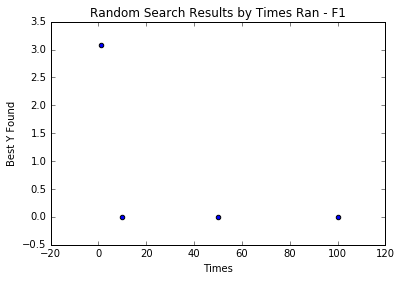

In [7]:
#plot min y value found for number of times random search algorithm ran on Function 1
results1_plot = plt.scatter(times_list, results1)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Random Search Results by Times Ran - F1')

** Run Random Search on Function 2 **

Random Search Minimum (x,y):  (-0.7562204532144912, -3.497744915731417) ran  1 times
Random Search Minimum (x,y):  (-1.0944747192937796, -3.5633628698328135) ran  10 times
Random Search Minimum (x,y):  (-0.9320321967566523, -3.7747890585937127) ran  50 times
Random Search Minimum (x,y):  (-0.932286294983844, -3.774850372725367) ran  100 times


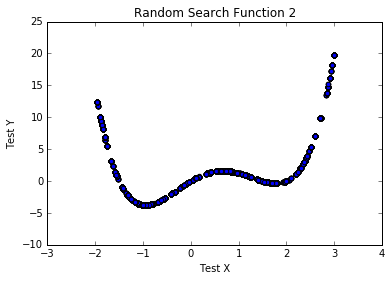

In [8]:
np.random.seed(456)
results2 = []
for i in times_list:
    # run random search on numbers ranging between -2 and 3
    best_y = random_search(-2, 3.0, i, 2)
    results2.append(best_y[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Random Search Function 2')


**Plot best performance of random search against number of points examined**

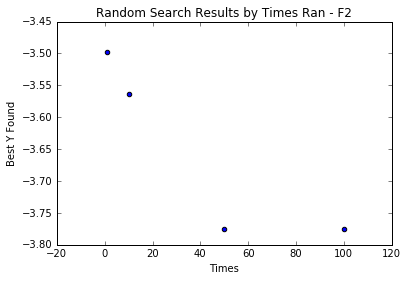

In [9]:
##plot min y value found for number of times random search algorithm ran on Function 2
results2_plot = plt.scatter(times_list, results2)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Random Search Results by Times Ran - F2')

## Report on Random Search
Random Seach takes a series of randomly generated points between a set low and high value and runs given number of times and then reports the best minimum that it has found. The more times the algorithm is ran, the higher the chance of hitting the actual minimum.   
On function 1, random search found close to the minimum by running it 10 times, but never actually found the exact minimum of (1, 0). It took 50 runs to find close to the global minimum on function 2.  
As the test values for x are randomly selected for each iteration of the algorithm, random chance may never hit on the correct value, only a close approximation. The more times the algorithm is run the higher the probabilty of geeting a good approximation for the optimum minimum

## Hill Climbing

** Define Hill Climbing Function**

In [10]:
# takes as inputs: initial x, step size, function
def hill_climbing(start, step, function):
    count = 0
    test_X = []
    test_Y = []
    best_y = None
    
    while True:
        current_x = start
        if function == 1:
            current_y = getY1(current_x)
            # look 1 step right and left and get corresponding y values
            y_right = getY1(current_x + step)
            y_left = getY1(current_x - step)
        elif function == 2:
            current_y = getY2(current_x)
            #look 1 step right and left and get corresponding y values
            y_right = getY2(current_x + step)
            y_left = getY2(current_x - step)
        test_X.append(current_x)
        test_Y.append(current_y)
        
        if count == 0:
            best_y = current_x, current_y
        elif current_y < best_y[1]:
            best_y = current_x, current_y
        elif current_y >= best_y[1]:
            break
        
        # go right or left depending on which gives better result
        if y_right < current_y:
            start = current_x + step
        elif y_left < current_y:
            start = current_x - step
        count = count +1
        
        hill_plot = plt.scatter(test_X, test_Y)  
    print 'Hill Climbing Minimum (x,y): ', best_y
    return best_y

** Run Hill Climbing on Function 1 - Start at 0**

Start at 0:  1  times
Hill Climbing Minimum (x,y):  (1.0000000000000002, 4.930380657631324e-32)
Start at 0:  10  times
Hill Climbing Minimum (x,y):  (1.0000000000000002, 4.930380657631324e-32)
Start at 0:  50  times
Hill Climbing Minimum (x,y):  (1.0000000000000002, 4.930380657631324e-32)
Start at 0:  100  times
Hill Climbing Minimum (x,y):  (1.0000000000000002, 4.930380657631324e-32)


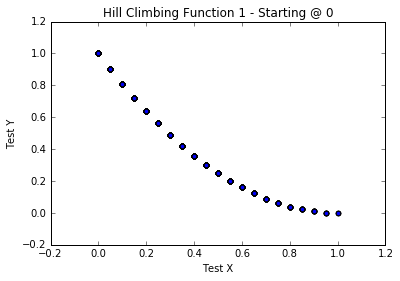

In [11]:
# run hill climbing algorithm, start at 0, step size .5, function 1
results3 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = hill_climbing(0, .05, 1)
    results3.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Hill Climbing Function 1 - Starting @ 0')


** Run Hill Climbing on Function 1 - Start at 1**

Start at 1:  1  times
Hill Climbing Minimum (x,y):  (1, 0.0)
Start at 1:  10  times
Hill Climbing Minimum (x,y):  (1, 0.0)
Start at 1:  50  times
Hill Climbing Minimum (x,y):  (1, 0.0)
Start at 1:  100  times
Hill Climbing Minimum (x,y):  (1, 0.0)


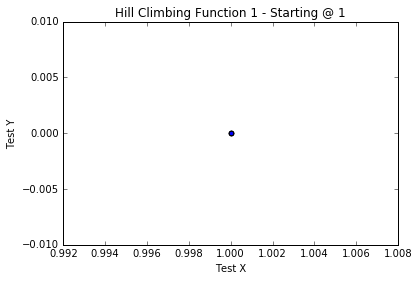

In [12]:
# run hill climbing algorithm, start at 1, step size .5, function 1
results4 = []
for i in times_list:
    print 'Start at 1: ', i, ' times'
    best = hill_climbing(1, .05, 1)
    results4.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Hill Climbing Function 1 - Starting @ 1')

**Plot best performance of Hill Climbing against number of points examined**

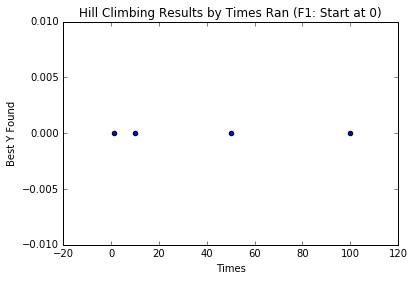

In [13]:
# plot min y value found for number of times hill climbing algorithm ran on Function 1, when starting at 0
results3_plot = plt.scatter(times_list, results3)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Hill Climbing Results by Times Ran (F1: Start at 0)')

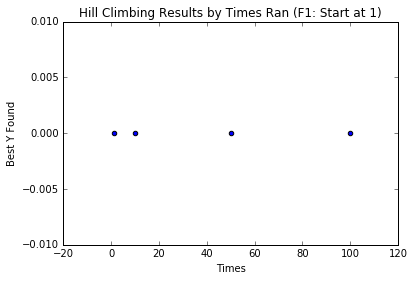

In [14]:
# plot min y value found for number of times hill climbing algorithm ran on Function 1, when starting at 1
results4_plot = plt.scatter(times_list, results4)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Hill Climbing Results by Times Ran (F1: Start at 1)')

** Run Hill Climbing on Function 2 - Start at 0 **

Start at 0:  1  times
Hill Climbing Minimum (x,y):  (-0.9500000000000003, -3.7763687499999996)
Start at 0:  10  times
Hill Climbing Minimum (x,y):  (-0.9500000000000003, -3.7763687499999996)
Start at 0:  50  times
Hill Climbing Minimum (x,y):  (-0.9500000000000003, -3.7763687499999996)
Start at 0:  100  times
Hill Climbing Minimum (x,y):  (-0.9500000000000003, -3.7763687499999996)


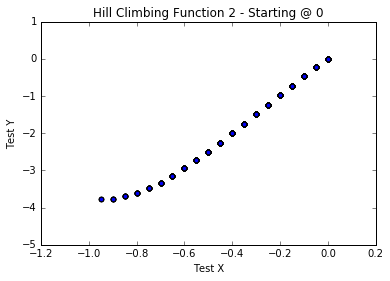

In [15]:
# run hill climbing algorithm, start at 0, step size .5, function 2
results5 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = hill_climbing(0, .05, 2)
    results5.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Hill Climbing Function 2 - Starting @ 0')

** Run Hill Climbing on Function 2 - Start at 1 **

Start at 1:  1  times
Hill Climbing Minimum (x,y):  (1.8000000000000007, -0.35639999999999983)
Start at 1:  10  times
Hill Climbing Minimum (x,y):  (1.8000000000000007, -0.35639999999999983)
Start at 1:  50  times
Hill Climbing Minimum (x,y):  (1.8000000000000007, -0.35639999999999983)
Start at 1:  100  times
Hill Climbing Minimum (x,y):  (1.8000000000000007, -0.35639999999999983)


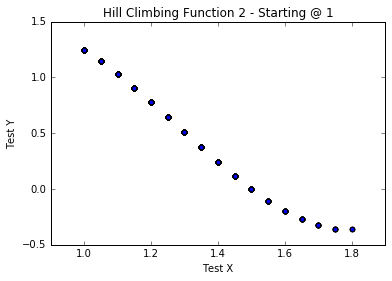

In [16]:
# run hill climbing algorithm, start at 1, step size .5, function 2
results6 = []
for i in times_list:
    print 'Start at 1: ', i, ' times'
    best = hill_climbing(1, .05, 2)
    results6.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Hill Climbing Function 2 - Starting @ 1')

**Plot best performance of Hill Climbing against number of points examined **

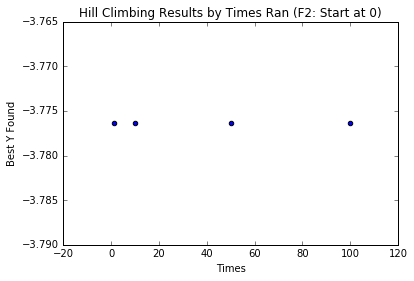

In [17]:
# plot min y value found for number of times hill climbing algorithm ran on Function 2, when starting at 0
results5_plot = plt.scatter(times_list, results5)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Hill Climbing Results by Times Ran (F2: Start at 0)')

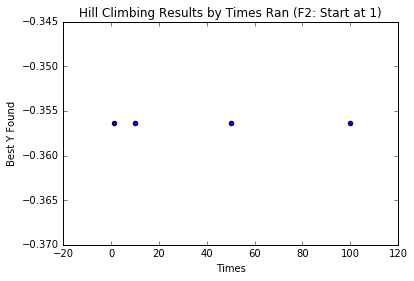

In [18]:
# plot min y value found for number of times hill climbing algorithm ran on Function 2, when starting at 1
results6_plot = plt.scatter(times_list, results6)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Hill Climbing Results by Times Ran (F2: Start at 1)')

## Report on Hill Climbing
Function 1: As this is a quadratic function it only has one minimum and so hill climbing/decending worked well as there was no local minima to get caught in. 
When starting at 0, varying the size of the step input into the function made a difference to how accurately it found the minimum value, but it was always very close. Calculating the minimum through calculus gives (1,0)
 
step 0.5 found (1.0000000000000002, 4.930380657631324e-32)
 
step 0.1 found (1.0000000000000007, 4.437342591868191e-31)
 
step 0.01 found (0.9999999999999999, 1.232595164407831e-32)
 
The algorithm is sensitive to the step parameter entered when it is run.
When starting at 1, the algorithm didn't go beyond the first iteration and found the exact minimum at (1,0) as the minimum value of the curve is when x=1. Neither moving left or right, will result in a better value for y, so the algorithm stops running.  If this was a local minimum, then the algorithm would get stuck and not find the global minimum.

Function 2: this function has three turning points where the slope of the tangent to the curve is 0 (from calculus) - two of them are minimum points, a local and a global minimum. The starting point of the algorithm had an effect as to whether or not the local or global minimum was found.  Starting at 0, downhill from there was towards the global minimum so the hill climbing algorithm found a close approximation for the global minimum.  As with function 1, again the size of the step determined the accuracy.  Starting at 1, downhill was towards the local minimum and once the hill climbing algorithm found this it was stuck. 

The number of times the algorithm is ran on either function makes no difference to the results, the same minimum is found each time

## Gradient Descent

** Define functions to get gradient at given point **

In [19]:
# Function 1
def get_gradient1(x):
    slope = (2*x)-2  # derivative of function 1 from calculus
    return slope

# Function 2
def get_gradient2(x):
    slope = (4*(x*x*x)) - (6*(x*x)) - (4.5*x) + 4.5  ## derivative of function 2 from calculus
    return slope
    

** Define Gradient Descent Function **

In [20]:
## Takes as inputs: initial x, initial step, alpha (value to reduce step per iteration), function
def gradient_descent(start, step, alpha, function ):
    count = 0
    test_X = []
    test_Y = []
    best_y = None
    
    while True:
        current_x = start
        # get y value and slope for current x value
        if function == 1:
            current_y = getY1(current_x)
            slope = get_gradient1(current_x)
        elif function == 2:
            current_y = getY2(current_x)
            slope = get_gradient2(current_x)
            
        test_X.append(current_x)
        test_Y.append(current_y)
        
        if count == 0:
            best_y = current_x, current_y
        elif current_y < best_y[1]:
            best_y = current_x, current_y
        elif current_y >= best_y[1]:
            break
        
        # get next x value, direction determined by sign of slope, size by taking progressively smaller
        # steps as the slope tends towards zero, the closer to the minimum the algorithm gets
        start = current_x - ((slope * alpha)* step)
               
        count = count +1
        
        grandient_plot = plt.scatter(test_X, test_Y)  
    print 'Gradient Descent Minimum (x,y): ', best_y
    return best_y

** Run Gradient Descent on Function 1 starting at 0 **

Start at 0:  1  times
Gradient Descent Minimum (x,y):  (0.9999999999999996, 1.9721522630525295e-31)
Start at 0:  10  times
Gradient Descent Minimum (x,y):  (0.9999999999999996, 1.9721522630525295e-31)
Start at 0:  50  times
Gradient Descent Minimum (x,y):  (0.9999999999999996, 1.9721522630525295e-31)
Start at 0:  100  times
Gradient Descent Minimum (x,y):  (0.9999999999999996, 1.9721522630525295e-31)


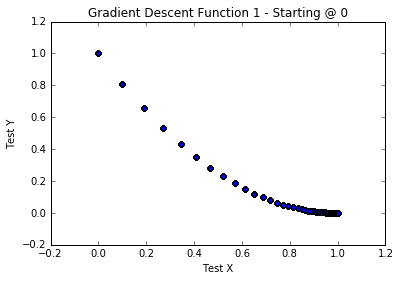

In [21]:
# run gradient descent algorithm on function 1, start @0, initial step .5 and alpha .1
results7 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = gradient_descent(0, .5, .1, 1)
    results7.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Gradient Descent Function 1 - Starting @ 0')

** Run Gradient Descent on Function 1 starting at 1 **

Start at 1:  1  times
Gradient Descent Minimum (x,y):  (1, 0.0)
Start at 1:  10  times
Gradient Descent Minimum (x,y):  (1, 0.0)
Start at 1:  50  times
Gradient Descent Minimum (x,y):  (1, 0.0)
Start at 1:  100  times
Gradient Descent Minimum (x,y):  (1, 0.0)


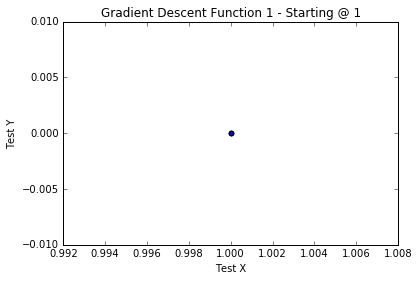

In [22]:
# run gradient descent algorithm on function 1, start @1, initial step .5 and alpha .1
results8 = []
for i in times_list:
    print 'Start at 1: ', i, ' times'
    best = gradient_descent(1, .5, .1, 1)
    results8.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Gradient Descent Function 1 - Starting @ 1')

** Run Gradient Descent on Function 2 starting at 0 **

Start at 0:  1  times
Gradient Descent Minimum (x,y):  (-0.9460648983670086, -3.776505318002156)
Start at 0:  10  times
Gradient Descent Minimum (x,y):  (-0.9460648983670086, -3.776505318002156)
Start at 0:  50  times
Gradient Descent Minimum (x,y):  (-0.9460648983670086, -3.776505318002156)
Start at 0:  100  times
Gradient Descent Minimum (x,y):  (-0.9460648983670086, -3.776505318002156)


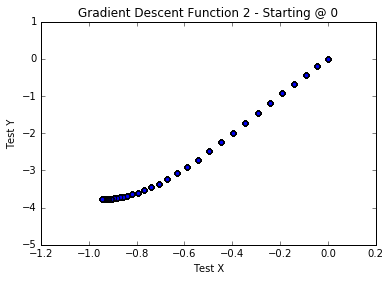

In [23]:
# run gradient descent algorithm on function 2, start @0, initial step .1 and alpha .1
results9 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = gradient_descent(0, 0.1, .1, 2)
    results9.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Gradient Descent Function 2 - Starting @ 0')

** Run Gradient Descent on Function 2 starting at 1 **

Start at 1:  1  times
Gradient Descent Minimum (x,y):  (1.7768123802242588, -0.35970689089653757)
Start at 1:  10  times
Gradient Descent Minimum (x,y):  (1.7768123802242588, -0.35970689089653757)
Start at 1:  50  times
Gradient Descent Minimum (x,y):  (1.7768123802242588, -0.35970689089653757)
Start at 1:  100  times
Gradient Descent Minimum (x,y):  (1.7768123802242588, -0.35970689089653757)


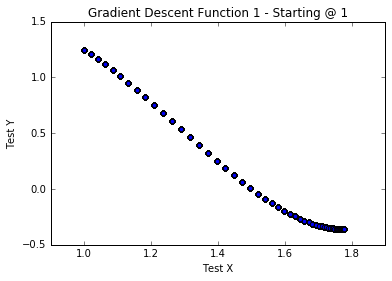

In [24]:
# run gradient descent algorithm on function 2, start @1, initial step .1 and alpha .1
results10 = []
for i in times_list:
    print 'Start at 1: ', i, ' times'
    best = gradient_descent(1, 0.1, .1, 2)
    results10.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Gradient Descent Function 1 - Starting @ 1')

**Plot best performance of Gradient Descent against number of points examined**

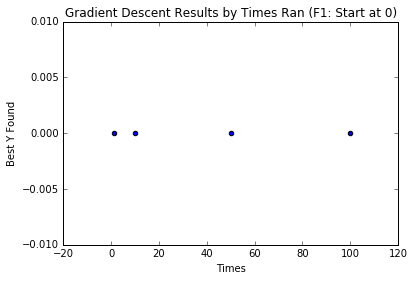

In [25]:
# plot min y value found for number of times gradient descent algorithm ran on Function 1, when starting at 0
results7_plot = plt.scatter(times_list, results7)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Gradient Descent Results by Times Ran (F1: Start at 0)')

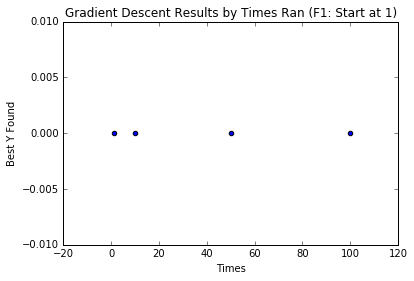

In [26]:
# plot min y value found for number of times gradient descent algorithm ran on Function 1, when starting at 1
results8_plot = plt.scatter(times_list, results8)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Gradient Descent Results by Times Ran (F1: Start at 1)')

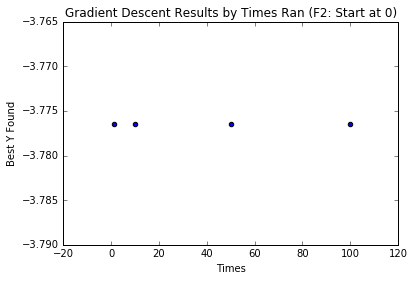

In [27]:
# plot min y value found for number of times gradient descent algorithm ran on Function 2, when starting at 0
results9_plot = plt.scatter(times_list, results9)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Gradient Descent Results by Times Ran (F2: Start at 0)')

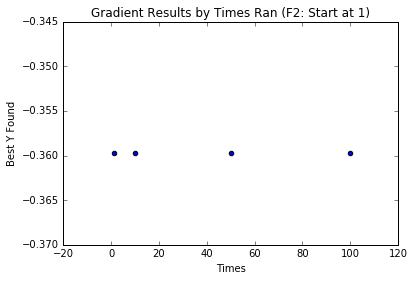

In [28]:
# plot min y value found for number of times gradient descent algorithm ran on Function 2, when starting at 1
results10_plot = plt.scatter(times_list, results10)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Gradient Results by Times Ran (F2: Start at 1)')

## Report on Gradient Descent
Function 1: As with the hill climbing algorithm, the quadratic nature of this function meant there so no local minimum for the gradient descent algorithm to get stuck in. While the hill climbing algorithm was sensitive to the step size entered as a parameter, this sensitivity is removed in the gradient descent algorithm as the slope of the curve is used as a multiplier for the initial step. this reduces the size of the step in porportion to the slope, as the point approaches the minimum the slope tends towards zero, making the algorithm take smaller steps.  
Gradient Descent gives a more accurate result than hill climbing for this reason:
minimum found when starting at 0: (0.9999999999999996, 1.9721522630525295e-31)
Starting at 1, had the same result as with hill climbing as the minimum of the curve was when x=1, as the slope at this point was 0, the algorithm stopped and did not search beyond this point as it could not get a better result.

Function 2: Gradient descent fell into the same trap as hill climbing with this function depending on the starting point. As the algorithm can only move downwards, starting near a local minimum means it gets stuck there and misses the global minimum. Because of the smaller steps the algorithm takes as it approaches the minimum the result is more accurate than the hill climbing algorithm. 
Starting at 0 found the global minimum of: (-0.9460648983670086, -3.776505318002156)
Starting at 1, got stuck in the local minimum of: (1.7768123802242588, -0.35970689089653757)

Like the hill climbing algorithm, the number of times ran on either function did not affect the outcome as the stopping condition is when the optimum stops improving, unlike the random search which just runs a given number of times and then returns the best result it has found at that point.  


## Simulated Annealing

**Define Acceptance Probability Function**

In [29]:
def acceptance_probability(new_y, old_y, temp):
    e = 2.71828
    ap = Decimal(e)  ** Decimal(((new_y - old_y)/temp))
    return ap



** Define Simulated Annealing Function **

In [30]:
## takes as inputs: initial x, range between low and high to generate next random points, function
def simulated_annealing(start, low, high, function):
    count = 0
    test_X = []
    test_Y = []
    best_y = None
    T = 1.0
    while T > 0.001:
        current_x = start
        #generate random next point between low and high values
        next_x = np.random.uniform(low, high)
                                   
        if function == 1:
            current_y = getY1(current_x)
            next_y = getY1(next_x)
        elif function == 2:
            current_y = getY2(current_x)
            next_y = getY2(next_x)
                                   
        test_X.append(current_x)
        test_Y.append(current_y)
        
        if count == 0:
            best_y = current_x, current_y
        elif current_y < best_y[1]:
            best_y = current_x, current_y
        else: 
            best_y = best_y
             
        #if next point generates better result go there
        if next_y < current_y:
            start = next_x
        #if next point generates worse result run probability function
        if next_y > current_y:
            ap = acceptance_probability(next_y, current_y, T)
            random = np.random.random()
            #if probability greater than random number go there
            if ap >= random:
                start = next_x
             
        count = count +1
        #reduce temp to reduce probability in each iteration
        T = T * 0.9
        
        simulated_plot = plt.scatter(test_X, test_Y)  
    print 'Simulated Annealing Minimum (x,y): ', best_y
    return best_y

**Run Simulated Annealing on Function 1 starting at 0**

Start at 0:  1  times
0 1.0 (0, 1.0)
-0.325064523821 1.75579599229 (0, 1.0)
-1.73746722065 7.49372678411 (0, 1.0)
1.77470807494 0.600172601372 (1.7747080749365, 0.6001726013718178)
-2.4613390421 11.9808679643 (1.7747080749365, 0.6001726013718178)
-1.66211690822 7.086866433 (1.7747080749365, 0.6001726013718178)
-0.234956537218 1.52511764882 (1.7747080749365, 0.6001726013718178)
0.72347020706 0.0764687263832 (0.7234702070604726, 0.07646872638317789)
-2.03993513545 9.24120562775 (0.7234702070604726, 0.07646872638317789)
0.901460304396 0.00971007160976 (0.9014603043958669, 0.00971007160975521)
0.377108293354 0.387994078209 (0.9014603043958669, 0.00971007160975521)
1.43397638699 0.188335504462 (0.9014603043958669, 0.00971007160975521)
2.65404231839 2.73585599102 (0.9014603043958669, 0.00971007160975521)
-2.68393747757 13.5713953387 (0.9014603043958669, 0.00971007160975521)
-0.0366254794487 1.07459238464 (0.9014603043958669, 0.00971007160975521)
1.26841502278 0.0720466244541 (0.9014603043958

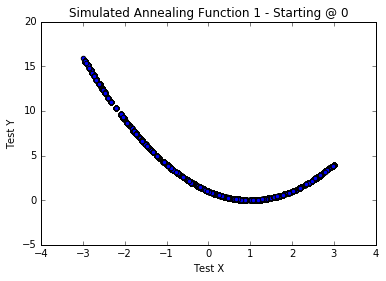

In [31]:
# run simulated annealing algorithm on function 1, start @0, search between -3 and 3
results11 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = simulated_annealing(0, -3, 3, 1)
    results11.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Simulated Annealing Function 1 - Starting @ 0')


**Run Simulated Annealing on Function 1 starting at 1**

Start at 0:  1  times
Simulated Annealing Minimum (x,y):  (1, 0.0)
Start at 0:  10  times
Simulated Annealing Minimum (x,y):  (1, 0.0)
Start at 0:  50  times
Simulated Annealing Minimum (x,y):  (1, 0.0)
Start at 0:  100  times
Simulated Annealing Minimum (x,y):  (1, 0.0)


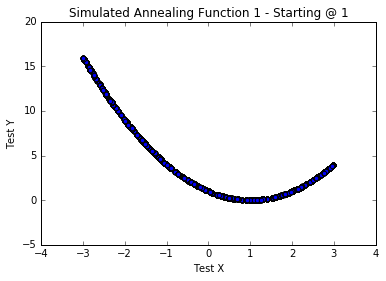

In [32]:
# run simulated annealing algorithm on function 1, start @1, search between -3 and 3
results12 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = simulated_annealing(1, -3, 3, 1)
    results12.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Simulated Annealing Function 1 - Starting @ 1')


**Run Simulated Annealing on Function 2 starting at 0**

Start at 0:  1  times
Simulated Annealing Minimum (x,y):  (-0.9860851407319036, -3.7620431599672433)
Start at 0:  10  times
Simulated Annealing Minimum (x,y):  (-0.9196514390329584, -3.7704742721827706)
Start at 0:  50  times
Simulated Annealing Minimum (x,y):  (-0.9693159736768253, -3.771676758345351)
Start at 0:  100  times
Simulated Annealing Minimum (x,y):  (-0.8576855541313662, -3.7117276906139947)


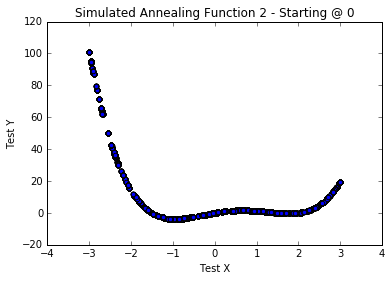

In [33]:
# run simulated annealing algorithm on function 2, start @0, search between -3 and 3
results13 = []
for i in times_list:
    print 'Start at 0: ', i, ' times'
    best = simulated_annealing(0, -3, 3, 2)
    results13.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Simulated Annealing Function 2 - Starting @ 0')


**Run Simulated Annealing on Function 2 starting at 1**

Start at 1:  1  times
Simulated Annealing Minimum (x,y):  (-0.9446367441812535, -3.7764873928188227)
Start at 1:  10  times
Simulated Annealing Minimum (x,y):  (-0.9759302632370757, -3.7685043860262173)
Start at 1:  50  times
Simulated Annealing Minimum (x,y):  (-0.9291340904776577, -3.774011734089383)
Start at 1:  100  times
Simulated Annealing Minimum (x,y):  (-0.964965371035384, -3.773323740756111)


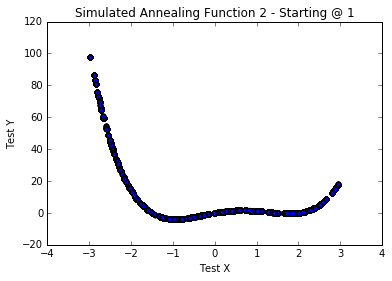

In [34]:
# run simulated annealing algorithm on function 2, start @1, search between -3 and 3
results14 = []
for i in times_list:
    print 'Start at 1: ', i, ' times'
    best = simulated_annealing(1, -3, 3, 2)
    results14.append(best[1])
plt.xlabel('Test X')
plt.ylabel('Test Y')
plt.title('Simulated Annealing Function 2 - Starting @ 1')


**Plot best performance of Simulated Annealing against number of points examined**

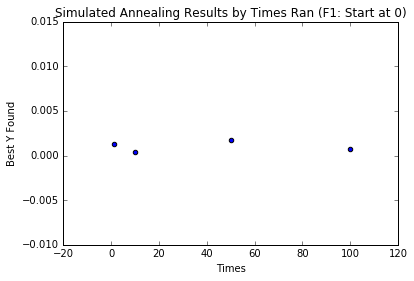

In [35]:
# plot min y value found for number of times simulated annealing algorithm ran on Function 1, when starting at 0
results11_plot = plt.scatter(times_list, results11)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Simulated Annealing Results by Times Ran (F1: Start at 0)')

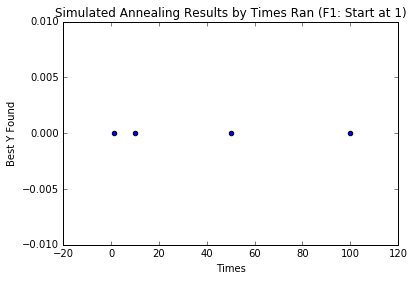

In [36]:
# plot min y value found for number of times simulated annealing algorithm ran on Function 1, when starting at 1
results12_plot = plt.scatter(times_list, results12)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Simulated Annealing Results by Times Ran (F1: Start at 1)')

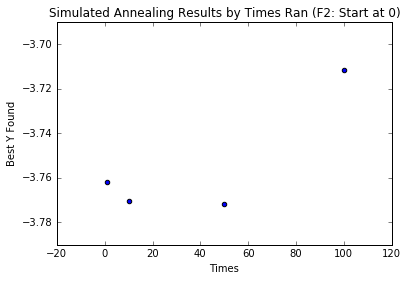

In [37]:
# plot min y value found for number of times simulated annealing algorithm ran on Function 2, when starting at 0
results13_plot = plt.scatter(times_list, results13)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Simulated Annealing Results by Times Ran (F2: Start at 0)')

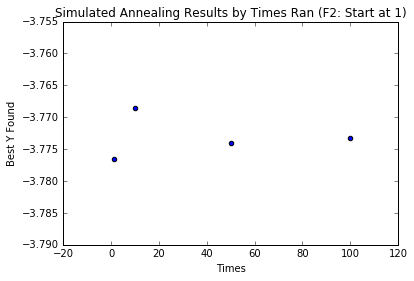

In [38]:
# plot min y value found for number of times simulated annealing algorithm ran on Function 2, when starting at 1
results14_plot = plt.scatter(times_list, results14)
plt.xlabel('Times')
plt.ylabel('Best Y Found') 
plt.title('Simulated Annealing Results by Times Ran (F2: Start at 1)')

## Report on Simulated Annealing

The Simulated Annealing algorithm takes a starting point (x=1 or x=0) and calculates the cost (y) at that point.  it then generates a random point and calculates y at this point.  If this new y has a lower cost than the previous y, the algorithm goes there and repeats the process.  If the new y is greater than it previous y, then a probability is calculated and compared to a random number, if the probabilty is higher than the random number, then this becomes the next point. This prevents becoming stuck in a local minimum as the algorithm sometimes goes "the wrong direction" to a higher cost point. 

Function1, starting at zero produced the following minima depending on number of times ran:
1  time     (0.9633862599540111, 0.0013405659601552543)
10  times   (0.9800087405804883, 0.00039965045317821694)
50  times   (1.0416827365897596, 0.001737450529611286)
100  times  (1.0275733367257942, 0.0007602888981940315)
each time the algorithm is ran results in a slightly different outcome, but all the outcomes are a close approximation for the global minimum, not as important given the convex nature of function 1 but can be seen in function 2, which had a local as well as global minimum. 
Regardless of the number of times ran on function 2 when starting at 1, the exact minimum of (1, 0) was always returned.  This is because it is forced to check at x=1, which is the minimum. Unlike the hill climbing and gradient descent methods, the simulated annealing continues to check other points until it has cooled sufficiently.  The exact value of the minimum when not starting at 1, is unlikely to be found as the random number generator may never give the exact value of 1.  

Function 2, starting at zero and running 100 times produced (-0.8576855541313662, -3.7117276906139947).  Starting at 1 and running 100 times produced (-0.964965371035384, -3.773323740756111). Unlike both the hill climbing and gradient descent methods when starting at 1, simulated annealing did not get stuck in the local minimum.  

Unlike hill climbing and gradient descent, Simulated Annealing does not return the same value, regardless of number of times ran but it does find a close approximation for the minimum point in all cases, regardless of starting point and does not get stuck in local minimums. This makes it useful where a problem is not convex and a close approximation of the global optimum is better than the risk of getting stuck in a local optimum. 


